In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color
from utils.utils_train import get_model_name

%matplotlib inline

/home/tianaoli/.conda/envs/pact/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
methods = [
    'Unrolled_ADMM_4iters', #'Unrolled_ADMM_8iters'
    'WienerNet',
    'ResUNet', 
    # 'No_Deconv', 
]
metrics = ['PSNR', 'SSIM']
ncs = [32, 16, 8]
markersizes = [12, 9.5, 7]
bias_ys = [[-0.0155, 0.007],
          [0.0054, 0.0038],
          [0.0022, 0.0022]]

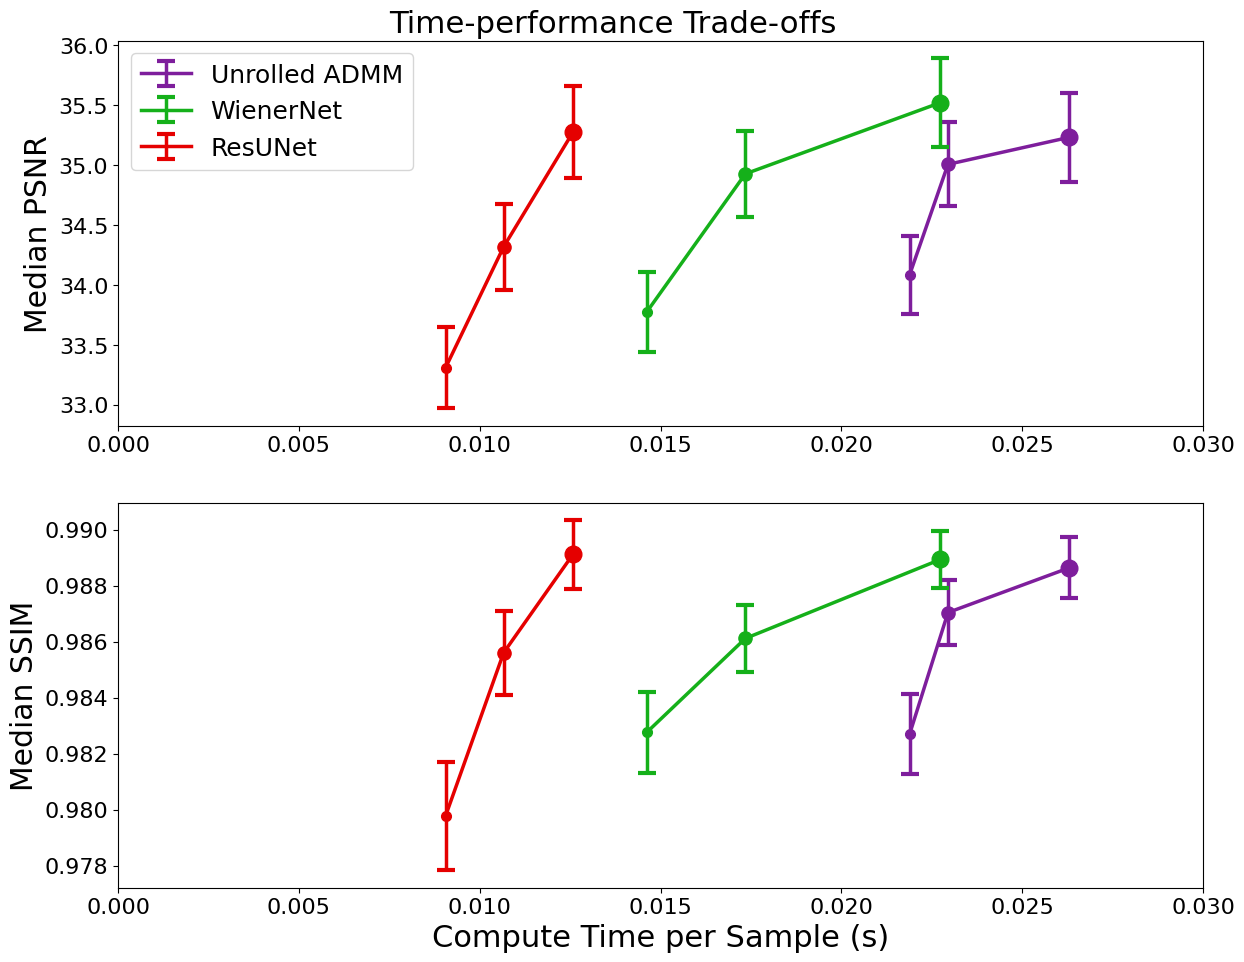

In [3]:
fig = plt.figure(figsize=(14,11), facecolor='white')

errscale = np.sqrt(2000)/5

for idx, metric in enumerate(metrics):
    ax1 = plt.subplot(2,1,idx+1)

    for method in methods:
        if method == 'No_Deconv':
            results_file = os.path.join('../results', method, 'results.json')
            with open(results_file, 'r') as f:
                results = json.load(f)
            rec_metric = np.array(results[metric]['rec'])
            ax1.errorbar(0, np.median(rec_metric), yerr=np.std(rec_metric)/errscale, linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=8.5, zorder=3, color=get_color(method), label=get_label(method))
            continue
        
        metric_medians = []
        metric_stds = []
        times = []
        for nc, markersize in zip(ncs, markersizes):
            results_file = os.path.join('../results', f'{method}_{nc}channels', 'results.json')
            with open(results_file, 'r') as f:
                results = json.load(f)
            rec_metric = np.array(results[metric]['rec'])
            total_time, n_gal = results['time']
            times.append(total_time/n_gal)
            metric_medians.append(np.median(rec_metric))
            metric_stds.append(np.std(rec_metric)/errscale)
            ax1.plot(total_time/n_gal, np.median(rec_metric), marker='o', markersize=markersize, zorder=3, color=get_color(method))
        ax1.errorbar(times, metric_medians, metric_stds, linewidth=2.5, capsize=6.5, capthick=3, marker='o', markersize=0, zorder=3, color=get_color(method), label=get_label(method))
    
    if idx == 0:
        handles,labels = ax1.get_legend_handles_labels()
        ax1.legend(handles, labels, fontsize=18)
        # ax1.set_ylim([32.8, 35.7])
        # ax1.set_yticks([0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18])
        # ax1.set_yticklabels(['0.06', '0.08', '0.10', '0.12', '0.14', '0.16', '0.18'])
        ax1.set_title('Time-performance Trade-offs', fontsize=22.2, x=0.25, y=1.0, loc='left')
    elif idx == 1:
        # ax1.set_ylim([0.97, 0.99])
        # ax1.set_yticks([0.97, 0.975, 0.98, 0.985, 0.99])
        # ax1.set_yticklabels(['0.970', '0.975', '0.980', '0.985', '0.990'])
        ax1.set_xlabel('Compute Time per Sample (s)', fontsize=22)
        
    ax1.set_xlim([0, 0.03])
    # ax1.set_yscale('log')
#     ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
#     ax1.set_xticklabels(['0', '0.005', '0.010', '0.015', '0.020', '0.025', '0.030'])
#     ax1.set_title(f'SNR={snr}', y=1.0, pad=-25, fontsize=21, loc='center')
    ax1.set_ylabel(f'Median {metric}', fontsize=21.5)    
    plt.tick_params(labelsize=16)
    
plt.savefig('../figures/error_time.jpg', bbox_inches='tight')